<a href="https://colab.research.google.com/github/JoyNjihia/WEEK-3-AI-FOR-S.E-ASSIGNMENT/blob/main/amazon_reviews_spacy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 55.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
=== Analyzed Reviews ===
                                              Review  \
0  I love my new Apple iPhone 13 – the camera is ...   
1  This Samsung Galaxy S21 overheats quickly. Ver...   
2  The Lenovo ThinkPad is perfect for work. Super...   
3  Avoid the cheap Huawei phone. The screen crack...   
4  I recently bought Sony headphones. Incredible ...   

                          Entities Sentiment  
0   [(Apple, ORG), (13, CARDINAL)]  Positive  
1                               []  Negative  
2                  [(Lenovo, ORG)]  Positive  
3  [(Huawei, ORG), (a week, DATE)

<ipython-input-1-2145862733>:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Sentiment", data=df, palette="Set2")


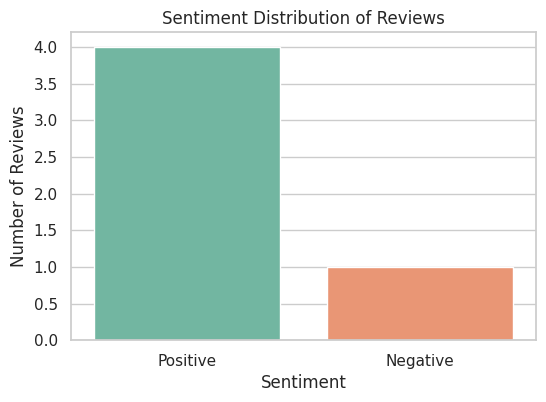


=== Named Entities Extracted ===

Review 1:
 - Apple (ORG)
 - 13 (CARDINAL)

Review 2:

Review 3:
 - Lenovo (ORG)

Review 4:
 - Huawei (ORG)
 - a week (DATE)

Review 5:
 - Sony (ORG)

✅ Results saved to 'analyzed_reviews.csv'


In [1]:
# 📦 NLP with spaCy on Amazon Product Reviews
# -------------------------------------------

# 🔧 Step 1: Install and import necessary libraries
!pip install spacy
!python -m spacy download en_core_web_sm

import spacy
from spacy.matcher import Matcher
from textblob import TextBlob
import pandas as pd

# 🧠 Load the small English model
nlp = spacy.load("en_core_web_sm")

# 📝 Step 2: Sample Amazon product reviews
reviews = [
    "I love my new Apple iPhone 13 – the camera is amazing and battery life is great!",
    "This Samsung Galaxy S21 overheats quickly. Very disappointed with the performance.",
    "The Lenovo ThinkPad is perfect for work. Super fast and reliable.",
    "Avoid the cheap Huawei phone. The screen cracked within a week.",
    "I recently bought Sony headphones. Incredible noise cancellation!",
]

# 🧾 Step 3: Function for Named Entity Recognition
def extract_entities(text):
    doc = nlp(text)
    return [(ent.text, ent.label_) for ent in doc.ents]

# 🧠 Step 4: Rule-based sentiment analysis using TextBlob
def analyze_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    return "Positive" if polarity > 0 else "Negative" if polarity < 0 else "Neutral"

# 📊 Step 5: Analyze all reviews
data = []
for review in reviews:
    entities = extract_entities(review)
    sentiment = analyze_sentiment(review)
    data.append({
        "Review": review,
        "Entities": entities,
        "Sentiment": sentiment
    })

# 📋 Convert to DataFrame for clean display
df = pd.DataFrame(data)


# ✅ Show the resulting DataFrame
print("=== Analyzed Reviews ===")
print(df)

# 📊 Step 6: Visualize sentiment distribution (optional)
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(x="Sentiment", data=df, palette="Set2")
plt.title("Sentiment Distribution of Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()

# 📌 Optional: Display named entities clearly per review
print("\n=== Named Entities Extracted ===")
for index, row in df.iterrows():
    print(f"\nReview {index+1}:")
    for entity, label in row["Entities"]:
        print(f" - {entity} ({label})")

# 💾 Optional: Save the result to a CSV file
df.to_csv("analyzed_reviews.csv", index=False)
print("\n✅ Results saved to 'analyzed_reviews.csv'")
